# Exploratory Data Analysis

### 1) Analysis

1. Univariate Analysis
2. Multivariate Analysis

### 2) Feature Engineering

1) Creating New Columns 
2) Modifying Existing Ones

### 3) Handling Outliers

1. Detect Outliers
2. Remove Outliers

### The Entire process is Highly Iterative

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/HP/Desktop/my/ArbaazPython/Datasets/Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### So far Conclusions:
1) Missing values in Age, Cabin, and Embarked column.
2) Cabin column has alot of missing values, so Drop cabin column.


In [8]:
# Filling Missing values in Age column

df["Age"].fillna(df["Age"].mean(), inplace=True)

In [9]:
# Filing Missing values in Embarked column

df["Embarked"].fillna('S', inplace=True)

In [10]:
# Droping Cabin column

df.drop(columns=["Cabin"], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Changing the Data Types

#### Survived (Category)
#### Pclass (Category)
#### Sex (Category)
#### Age (Int)
#### Embarked (Category)

In [12]:
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")
df["Sex"] = df["Sex"].astype("category")
df["Age"] = df["Age"].astype("int")
df["Embarked"] = df["Embarked"].astype("category")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [14]:
# Five Point Summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


# Univariate Analysis

Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

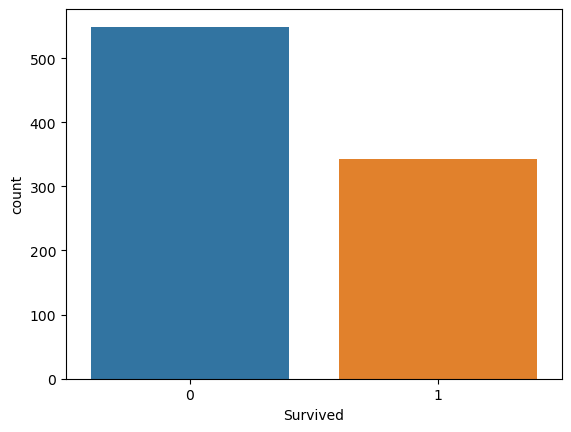

In [15]:
# Overall Survival

print(df["Survived"].value_counts())

sns.countplot(data=df, x=df["Survived"])

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

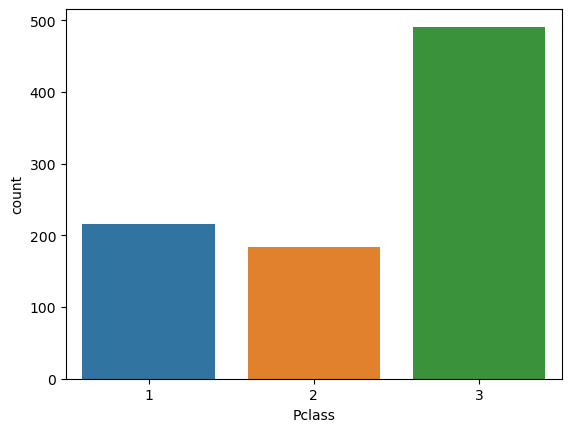

In [16]:
# Pclass

print(df["Pclass"].value_counts()/891*100)   # Percentage formula

sns.countplot(data=df, x=df["Pclass"])

SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: count, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

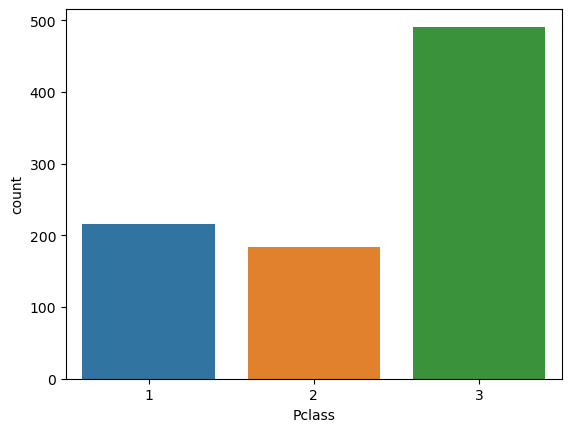

In [17]:
# SibSp

print(df["SibSp"].value_counts()/891*100)

sns.countplot(data=df, x=df["Pclass"])

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<Axes: xlabel='Parch', ylabel='count'>

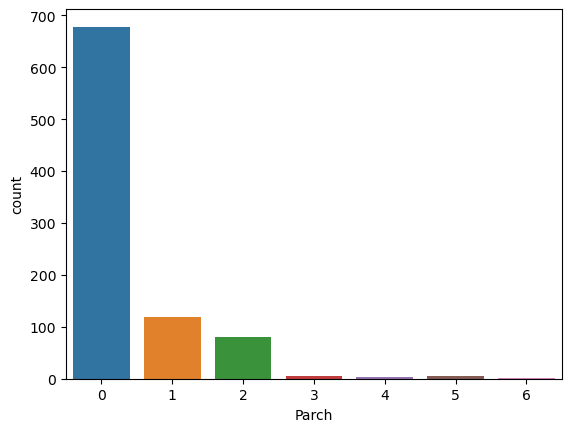

In [18]:
# Parch

print(df["Parch"].value_counts()/891*100)

sns.countplot(data=df, x=df["Parch"])

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

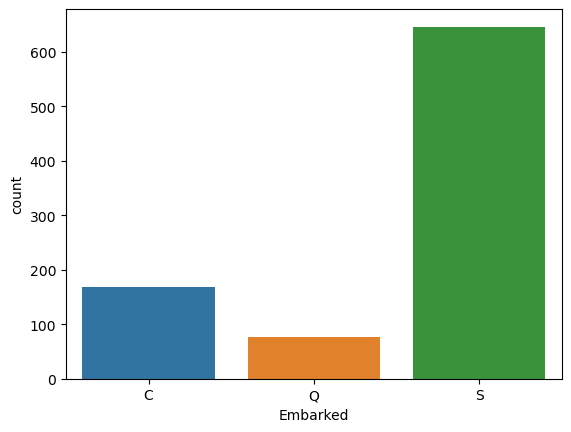

In [19]:
# Embarked

print(df["Embarked"].value_counts()/891*100)

sns.countplot(data=df, x=df["Embarked"])

0.45956263424701577
0.9865867453652877


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


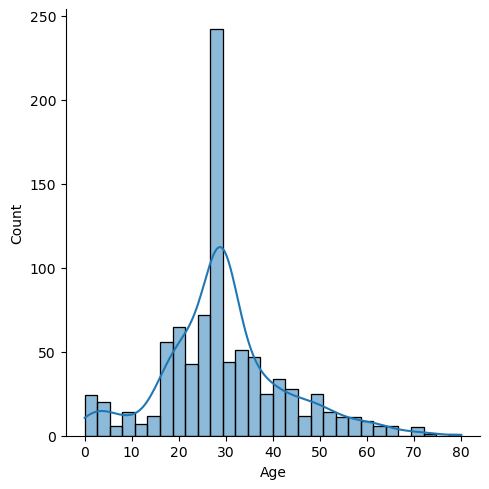

In [20]:
# Age 

print(df["Age"].skew())
print(df["Age"].kurt())

sns.displot(df["Age"], kde=True)

<Axes: >

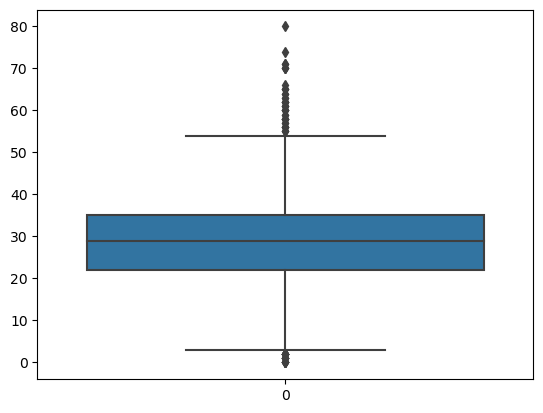

In [21]:
sns.boxplot(df["Age"])

In [22]:
# People between age of 60-70

df[(df["Age"]>60) & (df['Age']<70)].shape[0]

15

In [23]:
# People between age of 70-75

df[(df["Age"]>=70) & (df["Age"]<=75)].shape[0]

6

In [24]:
# People greater than 75

df[(df["Age"]>75)].shape[0]

1

# Conclusion
#### 1. Age can be considered as Normally Distributed
#### 2. Deeper Analysis is required for Outlier Detection

4.787316519674893
33.39814088089868


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


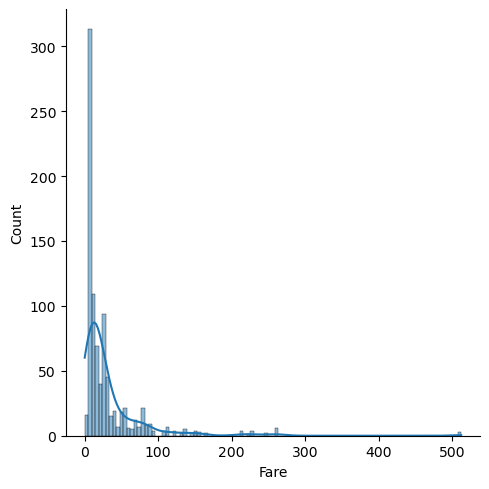

In [25]:
# Fare Column

print(df["Fare"].skew())
print(df["Fare"].kurt())   


sns.displot(df["Fare"], kde=True)

<Axes: >

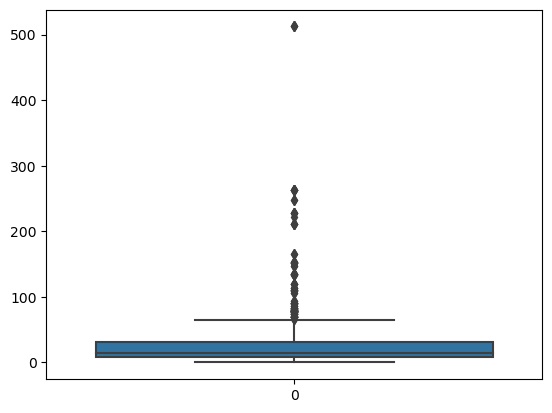

In [26]:
sns.boxplot(df["Fare"])

In [27]:
# People with Fare in between $200-$300

df[(df["Fare"]>200) & (df["Fare"]<300)].shape[0]

17

In [28]:
# People with Fare greater than $300

df[df["Fare"]>300].shape[0]

3

# Conclusion
#### 1. Highly Right Skewed Data, i.e. a lot of people had Cheaper Tickets
#### 2. Outliers are found in the data

# Multivariate Analysis

In [29]:
df.groupby("Sex")["Survived"].value_counts().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: xlabel='Survived', ylabel='count'>

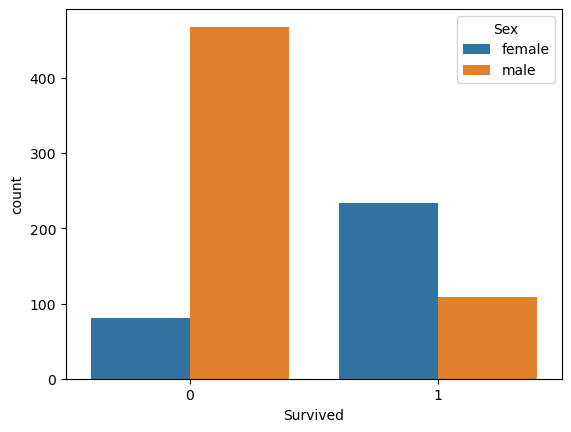

In [30]:
# Survival by Sex
sns.countplot(data=df, x=df["Survived"], hue=df["Sex"])

In [31]:
df.groupby('Pclass')['Survived'].value_counts().unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='count'>

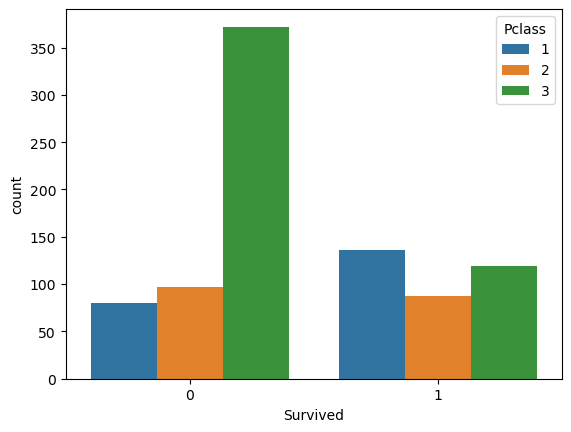

In [32]:
# Survival for different passenger classes (Pclass)

sns.countplot(data=df, x=df["Survived"], hue=df["Pclass"])

In [33]:
# Survival for (SibSp)

df.groupby("SibSp")["Survived"].value_counts().unstack()

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


<Axes: xlabel='Survived', ylabel='count'>

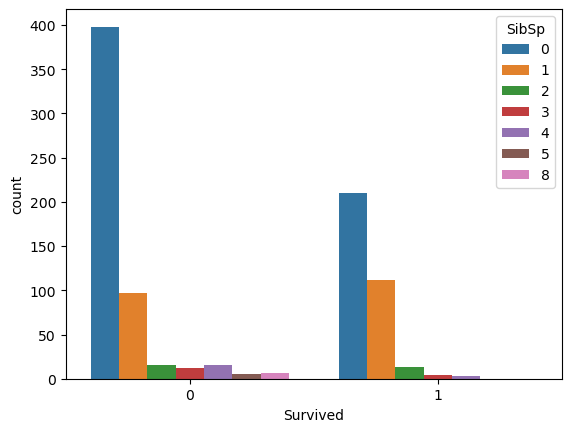

In [34]:
sns.countplot(data=df, x=df["Survived"], hue=df["SibSp"])

In [35]:
# Survival for (Parch)

df.groupby("Parch")["Survived"].value_counts().unstack()

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


<Axes: xlabel='Survived', ylabel='count'>

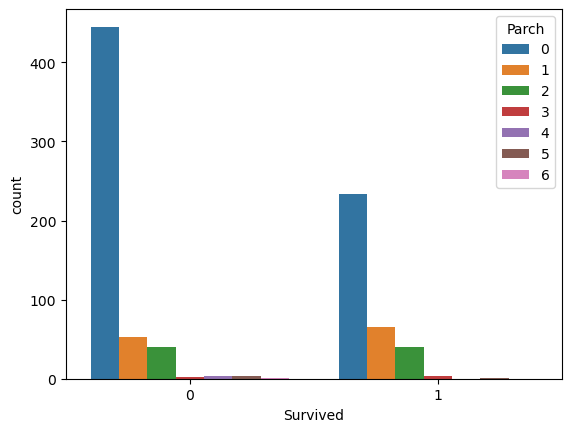

In [36]:
sns.countplot(data=df, x=df["Survived"], hue=df["Parch"])

In [37]:
# Survival for (Embarked)

df.groupby("Embarked")["Survived"].value_counts().unstack()

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


<Axes: xlabel='Survived', ylabel='count'>

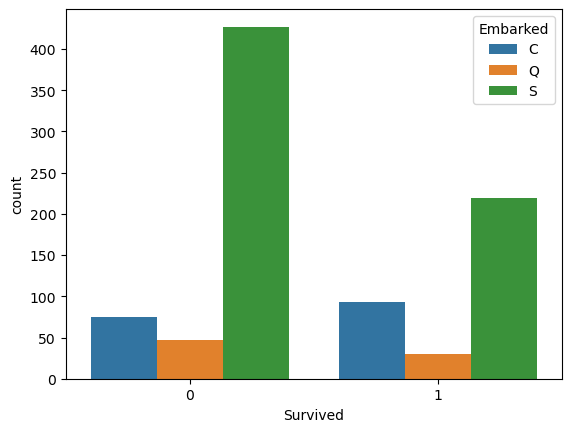

In [38]:
sns.countplot(data=df, x=df["Survived"], hue=df["Embarked"])

C:\Users\HP\AppData\Local\Temp\ipykernel_7300\1956532038.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Survived"]==0]["Age"])
C:\Users\HP\AppData\Local\Temp\ipykernel_7300\1956532038.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Survived"]==1]["Age"])


<Axes: xlabel='Age', ylabel='Density'>

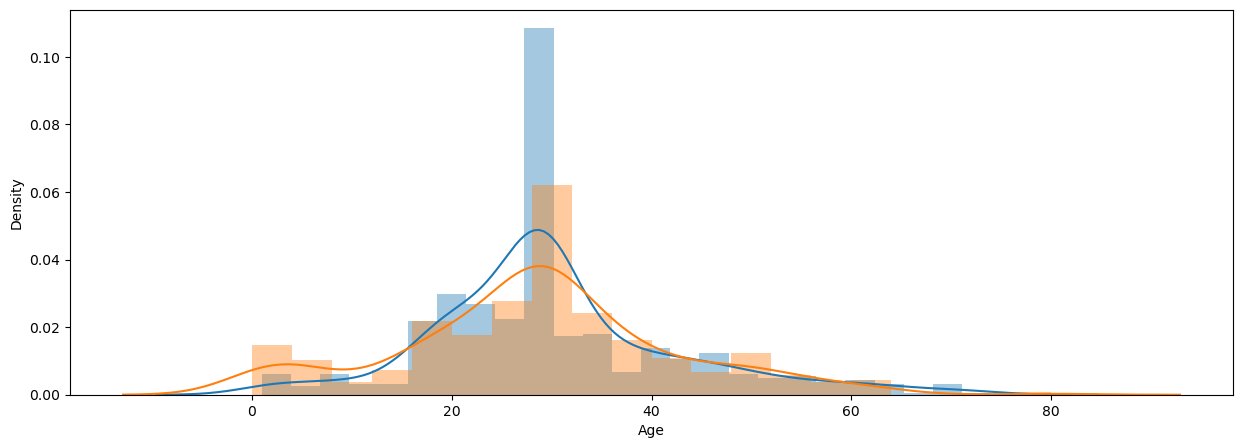

In [39]:
# Survived with Age

plt.figure(figsize=(15,5))
sns.distplot(df[df["Survived"]==0]["Age"])
sns.distplot(df[df["Survived"]==1]["Age"])

C:\Users\HP\AppData\Local\Temp\ipykernel_7300\3029676470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Survived"]==0]["Fare"])
C:\Users\HP\AppData\Local\Temp\ipykernel_7300\3029676470.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Survived"]==1]["Fare"])


<Axes: xlabel='Fare', ylabel='Density'>

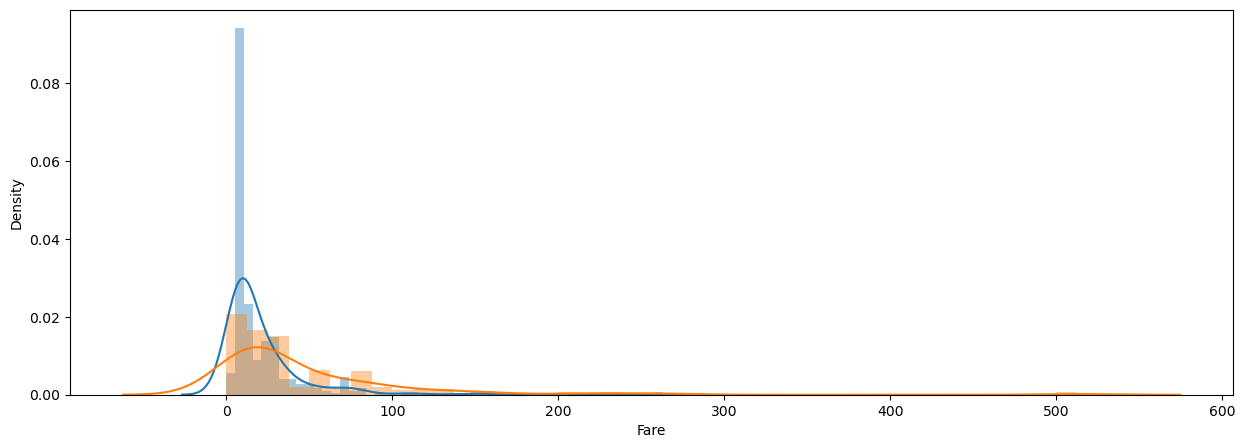

In [40]:
# Survived by Fare

plt.figure(figsize=(15,5))
sns.distplot(df[df["Survived"]==0]["Fare"])
sns.distplot(df[df["Survived"]==1]["Fare"])

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


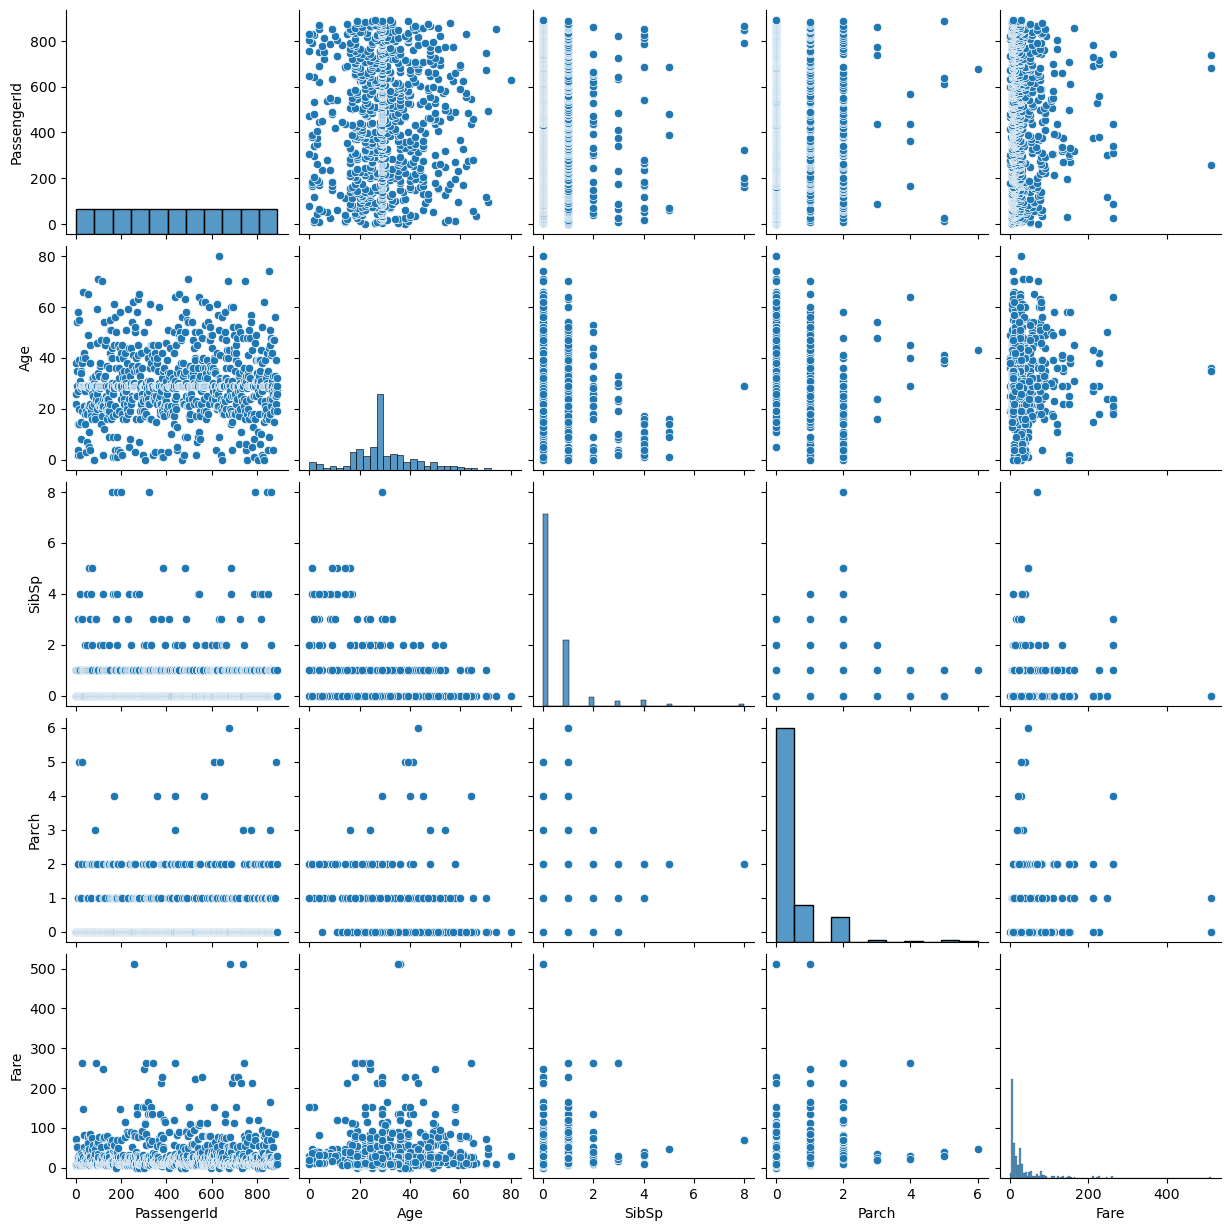

In [41]:
# Pairplot

sns.pairplot(df)

# Feature Engineering

In [42]:
# Creating a new column, that will have the sum of SibSp and Parch column.

df["Family_size"] = df["SibSp"]+df["Parch"]

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0


In [44]:
# Now we will Engineer a new feature, by the name of family_type

def family_type(num):
    if num==0:
        return "Alone"
    elif num>0 and num<=4:
        return "Medium"
    else:
        return "Large"

In [45]:
df["Family_type"] = df["Family_size"].apply(family_type)

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,Alone


In [47]:
# Dropping SibSp, Parch,and Family_size, because now they are not needed

df.drop(columns=["SibSp", "Parch", "Family_size"], inplace=True)

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,S,Alone


In [49]:
df.groupby("Family_type")["Survived"].value_counts().unstack()

Survived,0,1
Family_type,,
Alone,374,163
Large,40,7
Medium,135,172


# Detecting Ouliers

### Numerical Data

#### 1. If the data is following Normal Distribution, anything beyond 3*SD - mean + 3*SD can be considered as an Outlier.
#### 2. If the data does'nt follow Normal Distribution, we can se Boxplot to Eliminate points beyond (Q1-1.5*IQR) and (Q3+1.5*IQR)

### Categorical Data

#### 1. If the column is Highly Imbalanced, for eg:- MALE=1000 and FEMALE=3, then we can Eliminate the FEMALE

In [50]:
# Handling Outliers in Age column (Normally Distributed)

df = df[df["Age"]<(df["Age"].mean()+3+df["Age"].std())]

In [52]:
df.shape

(790, 10)

In [56]:
# Handling Outliers in Fare column

Q1 = np.percentile(df["Fare"],25)
Q3 = np.percentile(df["Fare"],75)

IQR = Q3-Q1

lower_fence = Q1-(1.5*IQR)
upper_fence = Q3+(1.5*IQR)


In [57]:
df = df[(df["Fare"]>lower_fence) & (df["Fare"]<upper_fence)]

In [62]:
df

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_type_Large,Family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,False,True,True,False,True,False,True
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,False,True,False,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,False,False,False,False,True,False,True
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,False,True,True,False,True,False,False
5,6,0,"Moran, Mr. James",29,330877,8.4583,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,True,False,True,False,True,False,False
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,False,False,False,False,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,False,True,False,False,True,False,True
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,False,False,True,False,False,False,False


### One Hot Encoding

#### It is done to Transform the Categorical Columns -----> Numerical Columns

In [59]:
df = pd.get_dummies(data=df, columns=["Pclass","Sex","Embarked","Family_type"], drop_first=True)

In [61]:
df

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_type_Large,Family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,False,True,True,False,True,False,True
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,False,True,False,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,False,False,False,False,True,False,True
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,False,True,True,False,True,False,False
5,6,0,"Moran, Mr. James",29,330877,8.4583,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,True,False,True,False,True,False,False
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,False,False,False,False,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,False,True,False,False,True,False,True
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,False,False,True,False,False,False,False


# Drawing Conclusion
##### Chances of Surviving for Female is MORE.
##### Travelling in Pclass was Deadliest.
##### Somehow people going to C Survived more.
##### People from Age between 20-40 had a Higher chance of NOT-Surviving.
##### Medium-Families had Higher chances of Surviving than that of the Larger=Families, and Alone Travellers